C:\Users\josem\AppData\Local\Temp\ipykernel_5196\1249464386.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_labels, y=y_values, palette=colores, ax=axs[0])
C:\Users\josem\AppData\Local\Temp\ipykernel_5196\1249464386.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_labels, y=y_values, palette=colores, ax=axs[1])
C:\Users\josem\AppData\Local\Temp\ipykernel_5196\1249464386.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_labels, y=y_values, palette=colores, ax=axs[0])
C:\Users\josem\AppData\Local\Temp\ipykernel_5196\124

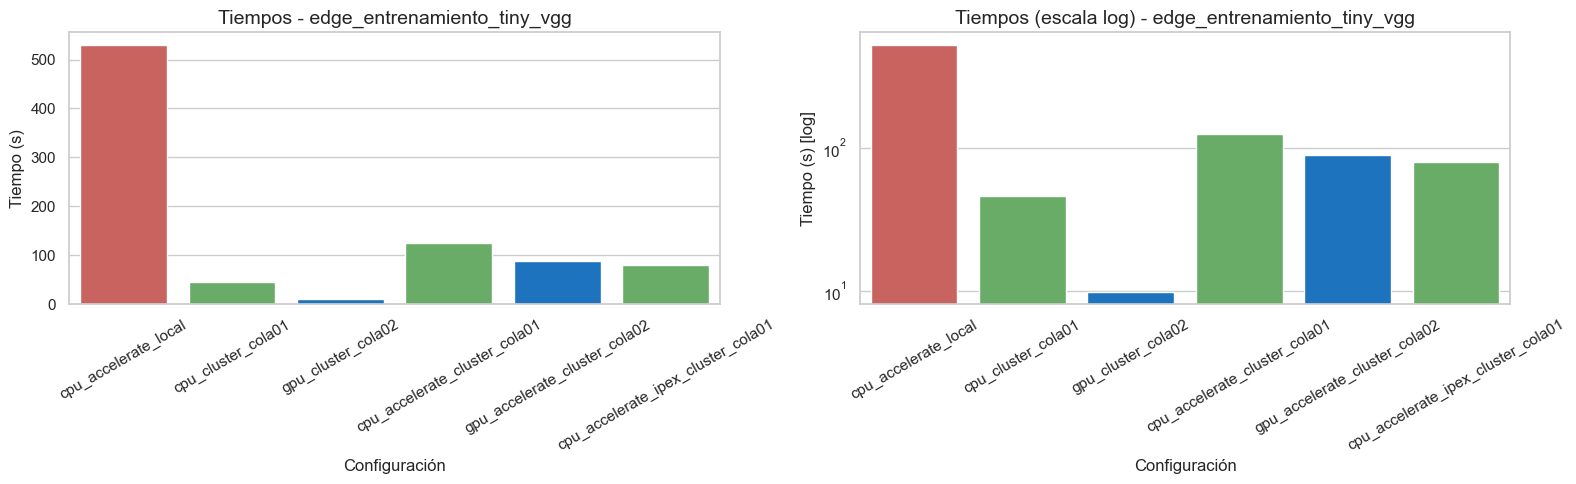

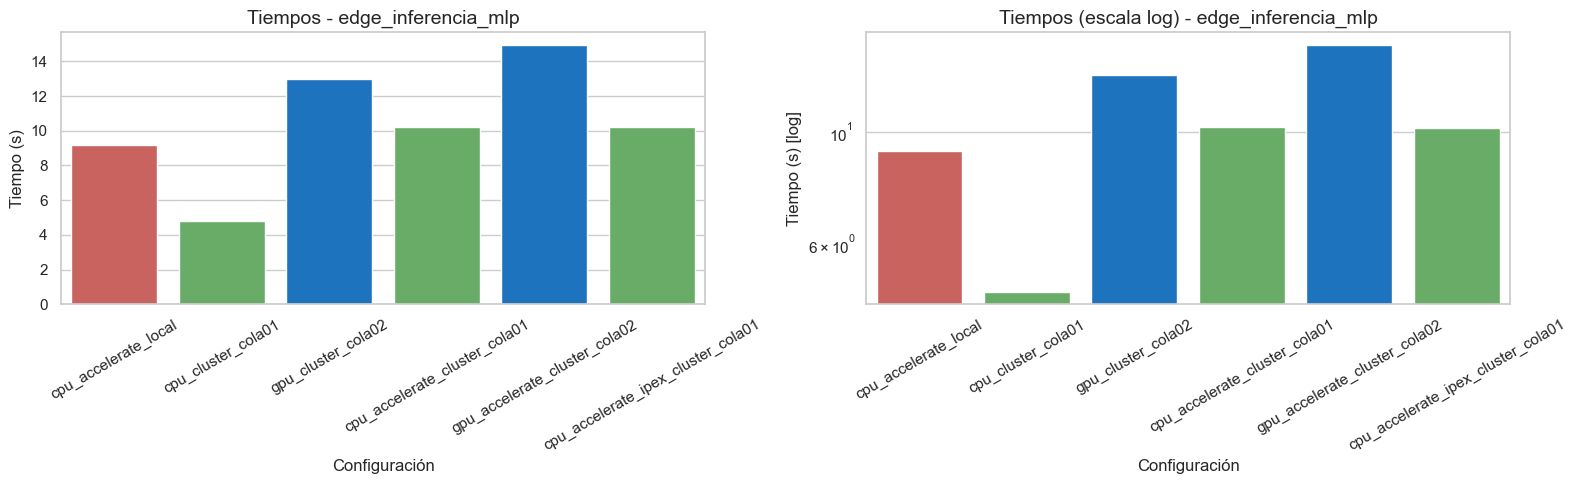

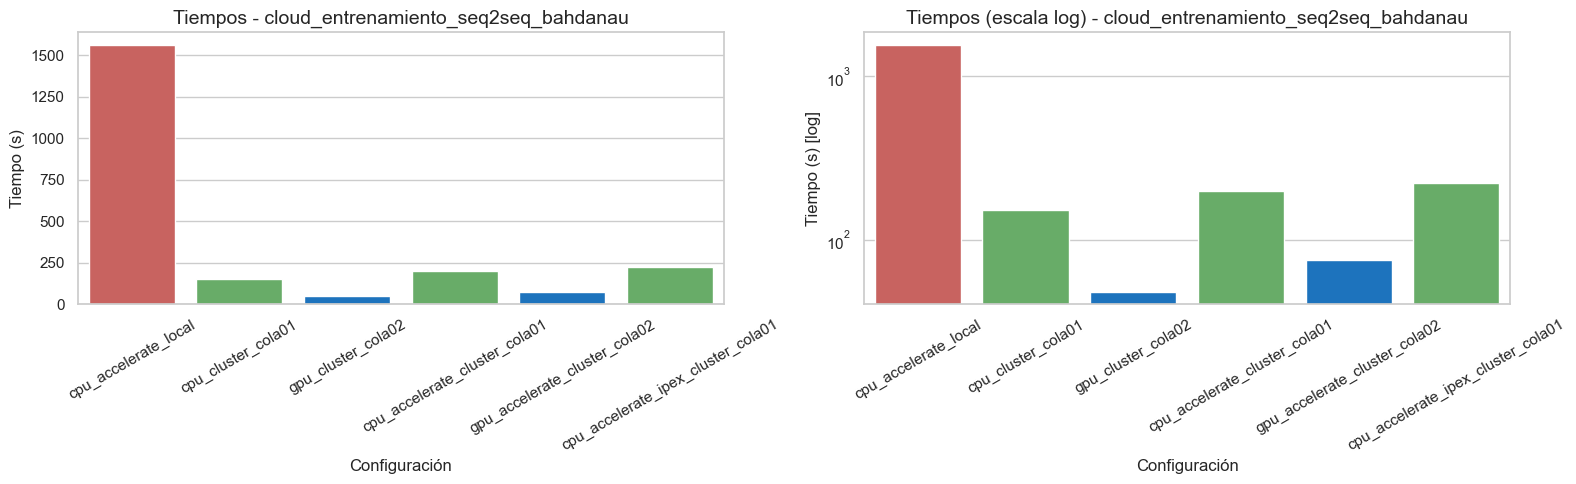

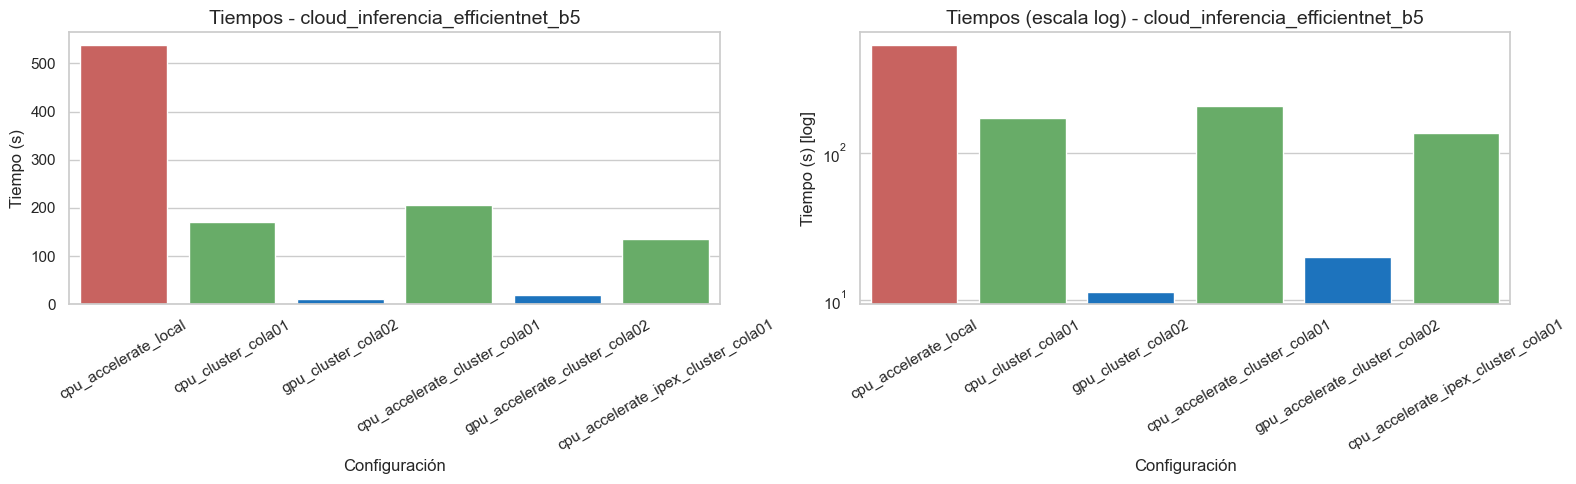

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Estilo Seaborn
sns.set(style="whitegrid")

# Reemplazar None por 0
tiempos = {
    "edge_entrenamiento_tiny_vgg": {
        "cpu_accelerate_local": 529.035,
        "cpu_cluster_cola01": 46.486,
        "gpu_cluster_cola02": 9.881,
        "cpu_accelerate_cluster_cola01": 126.151,
        "gpu_accelerate_cluster_cola02": 88.989,
        "cpu_accelerate_ipex_cluster_cola01": 80.603
    },
    "edge_inferencia_mlp": {
        "cpu_accelerate_local": 9.164,
        "cpu_cluster_cola01": 4.805,
        "gpu_cluster_cola02": 12.961,
        "cpu_accelerate_cluster_cola01": 10.226,
        "gpu_accelerate_cluster_cola02": 14.923,
        "cpu_accelerate_ipex_cluster_cola01": 10.199
    },
    "cloud_entrenamiento_seq2seq_bahdanau": {
        "cpu_accelerate_local": 1560.010,
        "cpu_cluster_cola01": 152.292,
        "gpu_cluster_cola02": 47.890,
        "cpu_accelerate_cluster_cola01": 199.42,
        "gpu_accelerate_cluster_cola02": 75.33,
        "cpu_accelerate_ipex_cluster_cola01": 221.95
    },
    "cloud_inferencia_efficientnet_b5": {
        "cpu_accelerate_local": 537.548,
        "cpu_cluster_cola01": 171.749,
        "gpu_cluster_cola02": 11.363,
        "cpu_accelerate_cluster_cola01": 206.512,
        "gpu_accelerate_cluster_cola02": 19.539,
        "cpu_accelerate_ipex_cluster_cola01": 134.59
    }
}

# Convertir a DataFrame
df = pd.DataFrame(tiempos).fillna(0).T

# Asignar colores más oscuros por tipo de configuración
def get_color(label):
    if "local" in label:
        return "#D9534F"  # rojo más oscuro
    elif "gpu" in label and "cola02" in label:
        return "#0275D8"  # azul oscuro
    elif "cpu" in label and "cola01" in label:
        return "#5CB85C"  # verde oscuro
    else:
        return "#888888"  # gris por defecto

# Crear gráficos dobles por experimento
figs = []
for modelo, tiempos_dict in df.iterrows():
    fig, axs = plt.subplots(1, 2, figsize=(16, 5))

    # Filtrar entradas válidas
    tiempos_filtrados = {k: v for k, v in tiempos_dict.items() if k in [
        "cpu_accelerate_local", "cpu_cluster_cola01", "gpu_cluster_cola02",
        "cpu_accelerate_cluster_cola01", "gpu_accelerate_cluster_cola02", "cpu_accelerate_ipex_cluster_cola01"
    ]}

    x_labels = list(tiempos_filtrados.keys())
    y_values = list(tiempos_filtrados.values())
    colores = [get_color(label) for label in x_labels]

    # Gráfico normal
    sns.barplot(x=x_labels, y=y_values, palette=colores, ax=axs[0])
    axs[0].set_title(f"Tiempos - {modelo}", fontsize=14)
    axs[0].set_ylabel("Tiempo (s)")
    axs[0].set_xlabel("Configuración")
    axs[0].tick_params(axis='x', rotation=30)

    # Gráfico logarítmico
    sns.barplot(x=x_labels, y=y_values, palette=colores, ax=axs[1])
    axs[1].set_yscale("log")
    axs[1].set_title(f"Tiempos (escala log) - {modelo}", fontsize=14)
    axs[1].set_ylabel("Tiempo (s) [log]")
    axs[1].set_xlabel("Configuración")
    axs[1].tick_params(axis='x', rotation=30)

    plt.tight_layout()
    figs.append(fig)

plt.show()
